# Multi dSprites

Mode `colored_on_grayscale`:
```
image       uint8   [64, 64, 3]
mask        bool    [6, 64, 64]
color       float32 [6, 3]
orientation float32 [6]
scale       float32 [6]
shape       uint8   [6]
visibility  bool    [6]
x           float32 [6]
y           float32 [6]
```


Mode `colored_on_colored`:
```
image        uint8   [64, 64, 3]
mask         bool    [5, 64, 64]
color        float32 [5, 3]
orientation  float32 [5]
scale        float32 [5]
shape        uint8   [5]
visibility   bool    [5]
x            float32 [5]
y            float32 [5]
```

Mode `binarized`:
```
image       uint8   [64, 64, 1]
mask        bool    [4, 64, 64]
color       float32 [4, 1]
orientation float32 [4]
scale       float32 [4]
shape       uint8   [4]
visibility  bool    [4]
x           float32 [4]
y           float32 [4]
```

Object in position `0` is always the background, only its `color` property is meaningful.

https://github.com/deepmind/multi_object_datasets

In [1]:
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

from pathlib import Path

import h5py
import matplotlib.pyplot as plt
import multi_object_datasets.multi_dsprites
import numpy as np
import pandas as pd
import tensorflow as tf
import tqdm

tf.get_logger().setLevel("WARNING")

num_cpus = 16
batch_size = 1000
data_root = Path.home() / "multi-object-datasets" / "multi_dsprites"

colored_on_grayscale


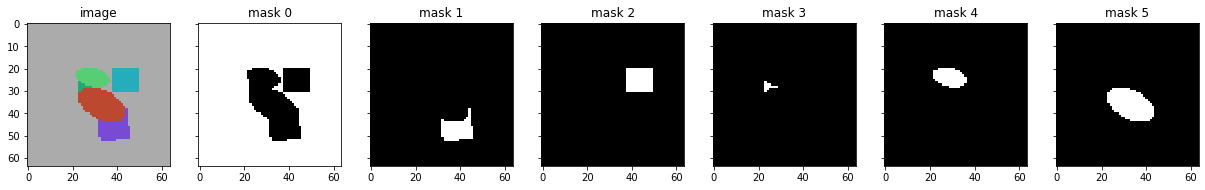

,visibility,x,y,shape,scale,orientation,color_RGB
0,True,0.000000,0.000000,0,0.0,0.000000,"[0.6737976, 0.6737976, 0.6737976]"
1,True,0.709677,0.935484,1,0.7,0.120830,"[0.47554696, 0.29283646, 0.8236981]"
2,True,0.870968,0.290323,1,0.6,0.000000,"[0.14931153, 0.68003803, 0.7346257]"
3,True,0.387097,0.516129,2,0.7,1.852734,"[0.123169616, 0.6657249, 0.46963057]"
4,True,0.419355,0.258065,2,0.6,2.899932,"[0.34223318, 0.81134105, 0.457406]"
5,True,0.548387,0.645161,2,0.9,2.658271,"[0.7405198, 0.28669852, 0.18555982]"


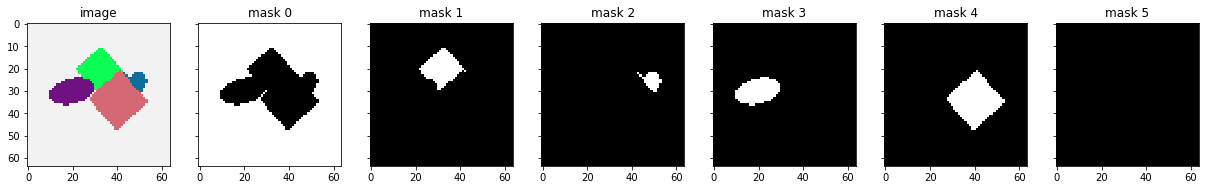

,visibility,x,y,shape,scale,orientation,color_RGB
0,True,0.000000,0.000000,0,0.0,0.000000,"[0.9526261, 0.9526261, 0.9526261]"
1,True,0.516129,0.161290,1,0.8,0.724983,"[0.042347074, 0.9968473, 0.3264769]"
2,True,0.935484,0.419355,3,0.8,0.000000,"[0.058918986, 0.43188792, 0.61462355]"
3,True,0.129032,0.451613,2,0.8,0.241661,"[0.44073302, 0.067533605, 0.509903]"
4,True,0.774194,0.580645,1,1.0,0.724983,"[0.83511543, 0.4138368, 0.45202196]"
5,False,0.935484,0.064516,2,0.6,0.483322,"[0.41194907, 0.69436324, 0.10009574]"


colored_on_colored


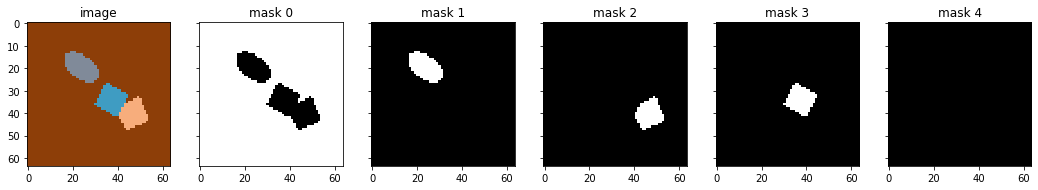

,visibility,x,y,shape,scale,orientation,color_RGB
0,True,0.000000,0.000000,0,0.0,0.000000,"[0.5553405, 0.24621713, 0.03461945]"
1,True,0.258065,0.129032,2,0.7,2.497164,"[0.5042784, 0.5418564, 0.6036805]"
2,True,0.967742,0.774194,1,0.6,0.402768,"[0.9721514, 0.6803423, 0.48959005]"
3,True,0.677419,0.580645,1,0.6,1.087474,"[0.25062144, 0.6156546, 0.7610481]"
4,False,0.000000,0.258065,1,0.8,0.120830,"[0.5112536, 0.83975863, 0.74347866]"


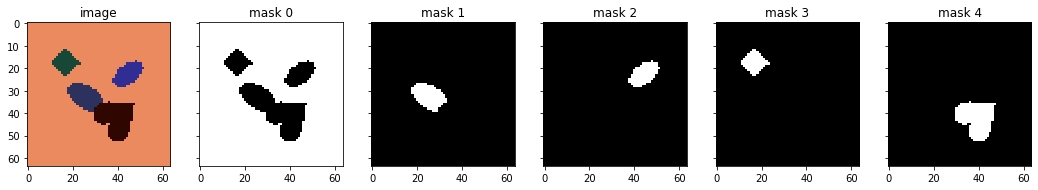

,visibility,x,y,shape,scale,orientation,color_RGB
0,True,0.000000,0.000000,0,0.0,0.000000,"[0.92283225, 0.54147875, 0.37573397]"
1,True,0.322581,0.548387,2,0.7,2.577717,"[0.17895937, 0.19258809, 0.36774743]"
2,True,0.903226,0.225806,2,0.6,0.644429,"[0.19182551, 0.1820178, 0.5810472]"
3,True,0.032258,0.064516,1,0.5,0.765260,"[0.09374845, 0.28032684, 0.21753955]"
4,True,0.774194,0.806452,3,1.0,2.255502,"[0.19213057, 0.024061799, 0.0006868839]"


binarized


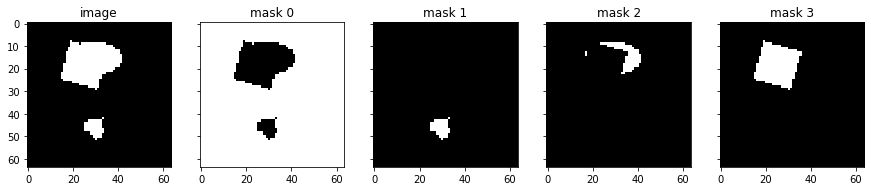

,visibility,x,y,shape,scale,orientation,color_RGB
0,True,0.000000,0.000000,0,0.0,0.000000,[0.0]
1,True,0.451613,0.935484,3,0.5,2.416610,[1.0]
2,True,0.419355,0.000000,2,1.0,0.000000,[1.0]
3,True,0.290323,0.096774,1,0.9,1.288859,[1.0]


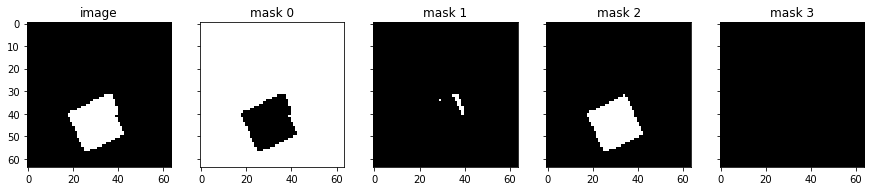

,visibility,x,y,shape,scale,orientation,color_RGB
0,True,0.000000,0.000000,0,0.0,0.000000,[0.0]
1,True,0.580645,0.677419,1,0.5,0.281937,[1.0]
2,True,0.451613,0.903226,1,1.0,0.443045,[1.0]
3,False,0.322581,0.516129,3,0.5,2.094395,[1.0]


In [2]:
def show_sample(sample):
    fig, axs = plt.subplots(
        1,
        1 + sample["mask"].shape[0],
        figsize=3 * np.array([1 + sample["mask"].shape[0], 1]),
        sharex=True,
        sharey=True,
    )

    if sample["image"].shape[2] == 3:
        axs[0].imshow(sample["image"], interpolation="none")
    else:
        axs[0].imshow(sample["image"][:, :, 0], cmap="gray", interpolation="none")
    axs[0].set_title("image")

    for m in range(sample["mask"].shape[0]):
        axs[m + 1].imshow(sample["mask"][m], cmap="gray", interpolation="none")
        axs[m + 1].set_title(f"mask {m}")

    fig.set_facecolor("white")
    display(fig)
    plt.close(fig)

    display(
        pd.DataFrame(
            {
                "visibility": sample["visibility"],
                "x": sample["x"],
                "y": sample["y"],
                "shape": sample["shape"],
                "scale": sample["scale"],
                "orientation": sample["orientation"],
                "color_RGB": list(sample["color"]),
            }
        )
    )


def fix_tf_dtypes(sample):
    sample["mask"] = tf.cast(tf.squeeze(sample["mask"], -1), tf.bool)
    sample["visibility"] = tf.cast(sample["visibility"], tf.bool)
    sample["shape"] = tf.cast(sample["shape"], tf.uint8)
    return sample


for mode in ["colored_on_grayscale", "colored_on_colored", "binarized"]:
    print(mode)
    tfr_path = data_root / f"multi_dsprites_{mode}.tfrecords"

    ds = multi_object_datasets.multi_dsprites.dataset(tfr_path.as_posix(), mode)
    ds = ds.map(fix_tf_dtypes)
    ds = ds.take(2)
    ds = ds.as_numpy_iterator()

    for sample in ds:
        show_sample(sample)

In [3]:
for mode in ["colored_on_grayscale", "colored_on_colored", "binarized"]:
    tfr_path = data_root / f"multi_dsprites_{mode}.tfrecords"
    h5_path = tfr_path.with_suffix(".h5")

    ds = multi_object_datasets.multi_dsprites.dataset(
        tfr_path.as_posix(), mode, map_parallel_calls=num_cpus
    )
    ds = ds.map(fix_tf_dtypes)
    ds = ds.batch(batch_size)
    ds = ds.as_numpy_iterator()

    with h5py.File(h5_path, "w") as h5_file:
        for batch in tqdm.tqdm(ds, desc=mode, unit=" samples", unit_scale=batch_size):
            for k in batch.keys():
                if k not in h5_file:
                    h5_file.create_dataset(
                        k,
                        data=batch[k],
                        shape=batch[k].shape,
                        maxshape=(None, *batch[k].shape[1:]),
                        chunks=True,
                        compression="lzf",
                        # compression="gzip",
                        # compression_opts=9,
                    )
                else:
                    h5_file[k].resize(h5_file[k].shape[0] + batch[k].shape[0], axis=0)
                    h5_file[k][-batch[k].shape[0] :] = batch[k]

    with h5py.File(h5_path, "r") as h5_file:
        for k in h5_file.keys():
            print(f"{k:<15} {str(h5_file[k].dtype):<10} {h5_file[k].shape}")

colored_on_grayscale: 1000000 samples [08:43, 1911.81 samples/s]


color           float32    (1000000, 6, 3)
image           uint8      (1000000, 64, 64, 3)
mask            bool       (1000000, 6, 64, 64)
orientation     float32    (1000000, 6)
scale           float32    (1000000, 6)
shape           uint8      (1000000, 6)
visibility      bool       (1000000, 6)
x               float32    (1000000, 6)
y               float32    (1000000, 6)


colored_on_colored: 1000000 samples [07:59, 2085.37 samples/s]


color           float32    (1000000, 5, 3)
image           uint8      (1000000, 64, 64, 3)
mask            bool       (1000000, 5, 64, 64)
orientation     float32    (1000000, 5)
scale           float32    (1000000, 5)
shape           uint8      (1000000, 5)
visibility      bool       (1000000, 5)
x               float32    (1000000, 5)
y               float32    (1000000, 5)


binarized: 1000000 samples [02:42, 6155.67 samples/s]

color           float32    (1000000, 4, 1)
image           uint8      (1000000, 64, 64, 1)
mask            bool       (1000000, 4, 64, 64)
orientation     float32    (1000000, 4)
scale           float32    (1000000, 4)
shape           uint8      (1000000, 4)
visibility      bool       (1000000, 4)
x               float32    (1000000, 4)
y               float32    (1000000, 4)
